In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import copy
import operator
from scipy import spatial

# Importujemy dane
dfnames = pd.read_csv('ssi/name.basics.tsv/data.tsv', sep='\t')
dfdata = pd.read_csv('ssi/title.basics.tsv/data.tsv', sep='\t')
dfcrew = pd.read_csv('ssi/title.crew.tsv/data.tsv', sep='\t')
dfratings = pd.read_csv('ssi/title.ratings.tsv/data.tsv', sep='\t')

C:\Users\Rafix\AppData\Local\Temp\ipykernel_11016\1674089133.py:11: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  dfdata = pd.read_csv('ssi/title.basics.tsv/data.tsv', sep='\t')


In [2]:
dfnames.info()
dfnames.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11628470 entries, 0 to 11628469
Data columns (total 6 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   nconst             object
 1   primaryName        object
 2   birthYear          object
 3   deathYear          object
 4   primaryProfession  object
 5   knownForTitles     object
dtypes: object(6)
memory usage: 532.3+ MB


,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0072308,tt0053137,tt0031983,tt0050419"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0117057,tt0037382,tt0038355,tt0071877"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0054452,tt0049189,tt0056404,tt0057345"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0080455,tt0072562,tt0077975,tt0078723"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0050976,tt0083922,tt0050986,tt0060827"


In [3]:
dfdata.info()
dfdata.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8920231 entries, 0 to 8920230
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   tconst          object
 1   titleType       object
 2   primaryTitle    object
 3   originalTitle   object
 4   isAdult         object
 5   startYear       object
 6   endYear         object
 7   runtimeMinutes  object
 8   genres          object
dtypes: object(9)
memory usage: 612.5+ MB


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [4]:
dfcrew.info()
dfcrew.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8922454 entries, 0 to 8922453
Data columns (total 3 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   tconst     object
 1   directors  object
 2   writers    object
dtypes: object(3)
memory usage: 204.2+ MB


,tconst,directors,writers
8922449,tt9916848,"nm5519454,nm5519375","nm6182221,nm1628284,nm2921377"
8922450,tt9916850,"nm5519454,nm5519375","nm6182221,nm1628284,nm2921377"
8922451,tt9916852,"nm5519375,nm5519454","nm6182221,nm1628284,nm2921377"
8922452,tt9916856,nm10538645,nm6951431
8922453,tt9916880,nm0996406,"nm1482639,nm2586970"


In [5]:
dfratings.info()
dfratings.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244079 entries, 0 to 1244078
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1244079 non-null  object 
 1   averageRating  1244079 non-null  float64
 2   numVotes       1244079 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 28.5+ MB


,tconst,averageRating,numVotes
0,tt0000001,5.7,1879
1,tt0000002,5.9,248
2,tt0000003,6.5,1653
3,tt0000004,5.8,161
4,tt0000005,6.2,2479


In [6]:
# --------------------------------------------------------------------
# --- Tworzymy z wyżej wymienionych baz jedną bazę i ją filtrujemy ---
# --------------------------------------------------------------------

merged = pd.merge(dfdata, dfratings, on='tconst')

merged = merged[merged['titleType'] != 'short']
merged = merged[merged['titleType'] != 'tvEpisode']
merged = merged[merged['titleType'] != 'videoGame']
merged = merged[merged['titleType'] != 'tvSpecial']
merged = merged[merged['titleType'] != 'tvSeries']
merged = merged[merged['titleType'] != 'tvShort']
merged = merged[merged['titleType'] != 'tvMiniSeries']
merged = merged[merged['titleType'] != 'video']
merged = merged[merged['titleType'] != 'tvMovie']

merged = merged[merged['tconst'] != '\\N']
merged = merged[merged['titleType'] != '\\N']
merged = merged[merged['originalTitle'] != '\\N']
merged = merged[merged['startYear'] != '\\N']
merged = merged[merged['runtimeMinutes'] != '\\N']
merged = merged[merged['genres'] != '\\N']
merged = merged[merged['averageRating'] != '\\N']
merged = merged[merged['numVotes'] != '\\N']

merged = merged.drop(['isAdult','endYear','primaryTitle', 'titleType'], axis=1)

merged['runtimeMinutes'] = pd.to_numeric(merged['runtimeMinutes'])
merged['startYear'] = pd.to_numeric(merged['startYear'])
merged = merged[merged['runtimeMinutes'] >= 30]
merged = merged[merged['runtimeMinutes'] <= 300]
merged = merged[merged['numVotes'] >= 10000]

In [7]:
merged.info()
merged.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9914 entries, 1613 to 1243529
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tconst          9914 non-null   object 
 1   originalTitle   9914 non-null   object 
 2   startYear       9914 non-null   int64  
 3   runtimeMinutes  9914 non-null   int64  
 4   genres          9914 non-null   object 
 5   averageRating   9914 non-null   float64
 6   numVotes        9914 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 619.6+ KB


,tconst,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes
1613,tt0004972,The Birth of a Nation,1915,195,"Drama,History,War",6.2,24458
2007,tt0006864,Intolerance: Love's Struggle Throughout the Ages,1916,163,"Drama,History",7.7,15373
2647,tt0009968,Broken Blossoms or The Yellow Man and the Girl,1919,90,"Drama,Romance",7.3,10239
2751,tt0010323,Das Cabinet des Dr. Caligari,1920,76,"Horror,Mystery,Thriller",8.0,62584
3285,tt0012349,The Kid,1921,68,"Comedy,Drama,Family",8.3,124508


In [8]:
# ---------------------------------------------------------
# --- Dodaję directors i writers do głównej bazy danych ---
# ---------------------------------------------------------

directors = copy.deepcopy(dfcrew)
writers = copy.deepcopy(dfcrew)

directors.rename(columns = {'directors':'nconst'}, inplace = True)
directors = directors.drop(['writers'], axis=1)
directors = directors[directors['nconst'] != '\\N']
writers.rename(columns = {'writers':'nconst'}, inplace = True)
writers = writers.drop(['directors'], axis=1)
writers = writers[writers['nconst'] != '\\N']

directors.rename(columns = {'nconst':'directors'}, inplace = True)
writers.rename(columns = {'nconst':'writers'}, inplace = True)

database = copy.deepcopy(merged)
database = pd.merge(database, directors, on='tconst')
database = pd.merge(database, writers, on='tconst')

merged = pd.merge(merged, directors, on='tconst')
merged = pd.merge(merged, writers, on='tconst')

In [9]:
# Wyświetlamy główną tabele danych
database.info()
database.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tconst          9827 non-null   object 
 1   originalTitle   9827 non-null   object 
 2   startYear       9827 non-null   int64  
 3   runtimeMinutes  9827 non-null   int64  
 4   genres          9827 non-null   object 
 5   averageRating   9827 non-null   float64
 6   numVotes        9827 non-null   int64  
 7   directors       9827 non-null   object 
 8   writers         9827 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 767.7+ KB


,tconst,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,directors,writers
0,tt0004972,The Birth of a Nation,1915,195,"Drama,History,War",6.2,24458,nm0000428,"nm0228746,nm0000428,nm0940488"
1,tt0006864,Intolerance: Love's Struggle Throughout the Ages,1916,163,"Drama,History",7.7,15373,nm0000428,"nm0048512,nm0115218,nm0000428,nm0002616,nm0640..."
2,tt0009968,Broken Blossoms or The Yellow Man and the Girl,1919,90,"Drama,Romance",7.3,10239,nm0000428,"nm0121885,nm0000428"
3,tt0010323,Das Cabinet des Dr. Caligari,1920,76,"Horror,Mystery,Thriller",8.0,62584,nm0927468,"nm0562346,nm0417917"
4,tt0012349,The Kid,1921,68,"Comedy,Drama,Family",8.3,124508,nm0000122,nm0000122


In [10]:
class Person:
  # inicjuje użytkownika
  def __init__(self, name):
    self.name = name
    self.history = {}
    self.splitHistory = {}
    
  # dodaje wpis do historii, tytuł filmu wraz z oceną
  def addMovieToHistory(self, originalTitle, rating):
    self.history[originalTitle] = rating
    
  # sortuje historie użytkownika
  def sortByRating(self):
    self.history = dict(sorted(self.history.items(), key=lambda item: item[1], reverse=True))
    
  # dzieli historie na wyżej i gorzej oceniane filmy dla danego użytkownika
  def splitSet(self):
    avg = np.array(list(self.history.values())).mean()
    for index, value in self.history.items():
        if value >= avg:
            self.splitHistory[index] = value
            
  # zwraca historie obejrzanych filmów
  def getHistory(self):
    tab=[]
    for title in self.history:
        tab.append(title)
    return tab
    
  # zwraca historie najlepszych filmów według oceny użytkownika (maks 3)
  def getBestHistory(self):
    tab=[]
    self.sortByRating()
    self.splitSet()
    for title in self.splitHistory:
        tab.append(title)
        if len(tab) == 3:
            break
    return tab

In [11]:
# Dodawanie profilu użytkownika i uzupełnianie historii obejrzanych filmów
Kamil = Person("Kamil")
Kamil.addMovieToHistory("Häxan", 5.5)
Kamil.addMovieToHistory("Coffee & Kareem", 10)
Kamil.addMovieToHistory("I Care a Lot", 8.5)
Kamil.addMovieToHistory("Das Cabinet des Dr. Caligari", 9)
Kamil.addMovieToHistory("The Kid", 9)

# Zwraca najlepiej oceniane filmy według użytkownika
Kamil.getBestHistory()

['Coffee & Kareem', 'Das Cabinet des Dr. Caligari', 'The Kid']

In [12]:
class DataSet:
  @staticmethod
  def name_find(id):
    people_assign = copy.deepcopy(dfnames)
    people_assign = people_assign.drop(['birthYear','deathYear','primaryProfession', 'knownForTitles'], axis=1)
    return ((people_assign.loc[people_assign['nconst'] == id]).iloc[0][1])

  @staticmethod
  def drawPlot(data, title, findByName = False, limit=99999):
    plt.subplots(figsize=(12,10))
    if findByName:
      tab=[]
      series = pd.Series(data).value_counts()[:20].sort_values(ascending=True)
      for x in series.index:
        tab.append(DataSet.name_find(x))
      series.index = tab
      ax=series.plot.barh(width=0.9,color=sns.color_palette('muted',40))
      for i, v in enumerate(pd.Series(data).value_counts()[:20].sort_values(ascending=True).values): 
        ax.text(.8, i, v,fontsize=10,color='black',weight='bold')
    else:    
      ax = pd.Series(data).value_counts()[:limit].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('hls',10))
      for i, v in enumerate(pd.Series(data).value_counts()[:limit].sort_values(ascending=True).values): 
        ax.text(.8, i, v,fontsize=12,color='black',weight='bold')
    plt.title(title)
    plt.show()

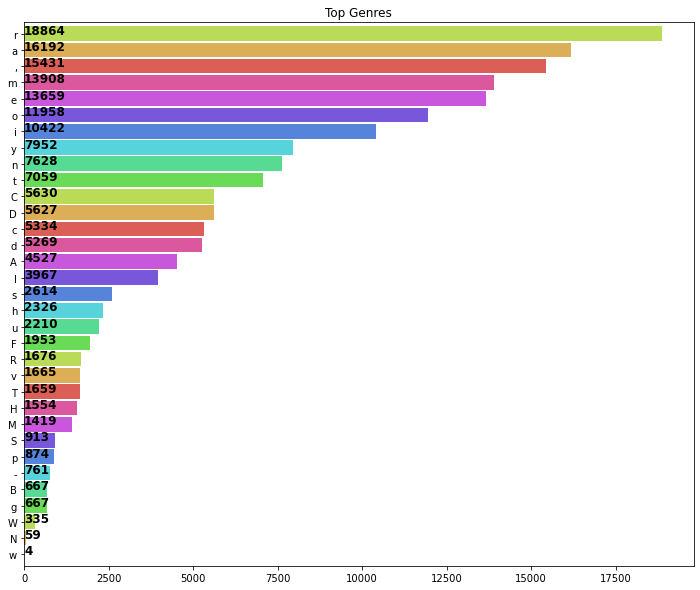

In [13]:
# wykres Top Genres
plotGenresData = []
for i in database['genres']:
    plotGenresData.extend(i)

DataSet.drawPlot(plotGenresData, 'Top Genres')

In [14]:
# zamienianie genres na wersje numeryczną dla KNNa
database['genres'] = database['genres'].str.split(',')

genreList = []
for index, row in database.iterrows():
    genres = row["genres"]
    
    for genre in genres:
        if genre not in genreList:
            genreList.append(genre)
            
            
def binary(genre_list):
    binaryList = []
    
    for genre in genreList:
        if genre in genre_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    
    return binaryList

In [15]:
database['genres_bin'] = database['genres'].apply(lambda x: binary(x))
database['genres_bin'].head()

0    [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1    [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2    [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3    [0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...
4    [1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, ...
Name: genres_bin, dtype: object

In [16]:
# zamienianie directors na wersje numeryczną dla KNNa
tab_directors=[]
for x in database['directors']:
    if ',' in x:
        tab = x.split(',')
        for y in tab:
            tab_directors.append(y)
    else:
        tab_directors.append(x)

In [17]:
database['directors'] = database['directors'].str.split(',')

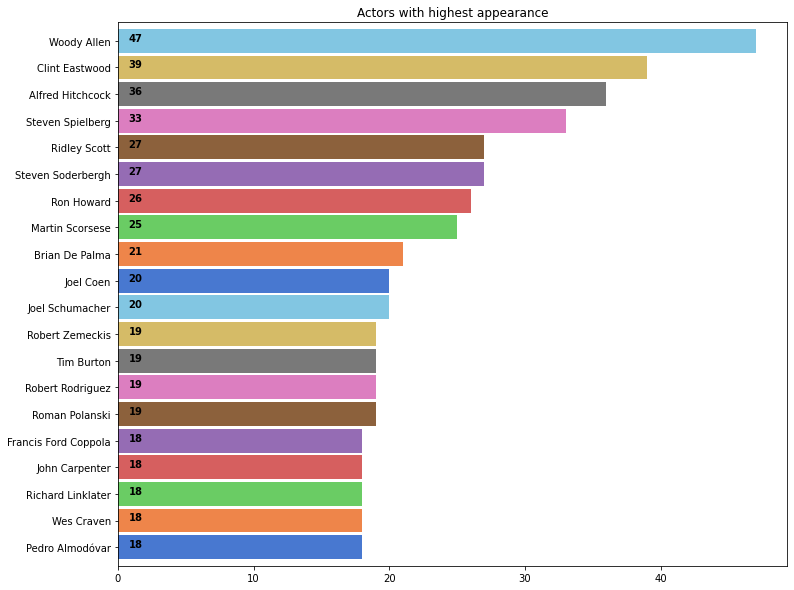

In [18]:
plotDirectorData=[]
for i in tab_directors:
    plotDirectorData.append(i)

DataSet.drawPlot(plotDirectorData, 'Actors with highest appearance', True, 20)

In [19]:
directorList = []
            
for director in tab_directors:
    if director not in directorList:
        directorList.append(director)
        
def binary(cast_list):
    binaryList = []
    
    for director in directorList:
        if director in cast_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    
    return binaryList

In [20]:
database['director_bin'] = database['directors'].apply(lambda x: binary(x))

In [21]:
# zamienianie writers na wersje numeryczną dla KNNa

tab_writers=[]
for x in database['writers']:
    if ',' in x:
        tab = x.split(',')
        for y in tab:
            tab_writers.append(y)
    else:
        tab_writers.append(x)

In [22]:
database['writers'] = database['writers'].str.split(',')

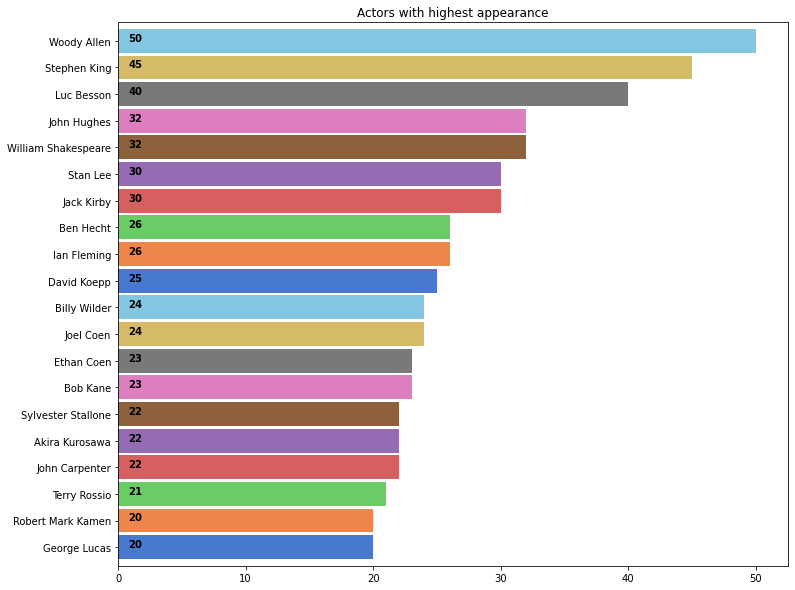

In [23]:
plotWritersData=[]
for i in tab_writers:
    plotWritersData.append(i)

DataSet.drawPlot(plotWritersData, 'Actors with highest appearance', True, 20)

In [24]:
writerList = []
for writer in tab_writers:
    if writer not in writerList:
        writerList.append(writer)

In [25]:
def binary(writer_list):
    binaryList = []
    
    for writer in writerList:
        if writer in writer_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    
    return binaryList

In [26]:
database['writer_bin'] = database['writers'].apply(lambda x: binary(x))

In [27]:
def Similarity(movieId1, movieId2):
    a = database.iloc[movieId1]
    b = database.iloc[movieId2]
    
    genresA = a['genres_bin']
    genresB = b['genres_bin']
    
    genreDistance = spatial.distance.cosine(genresA, genresB)
    
    directorA = a['director_bin']
    directorB = b['director_bin']
    directorDistance = spatial.distance.cosine(directorA, directorB)
    
    writerA = a['writer_bin']
    writerB = b['writer_bin']
    writerDistance = spatial.distance.cosine(writerA, writerB)
    
    return genreDistance + writerDistance + directorDistance

In [28]:
new_id = list(range(0,database.shape[0]))
database['new_id']=new_id
database=database[['tconst','originalTitle','startYear','runtimeMinutes','genres','averageRating','numVotes','writers','genres_bin','director_bin','writer_bin','new_id']]

In [29]:
def predict_score(name,K,user):
    new_movie = database[database['originalTitle'].str.contains(name)].iloc[0].to_frame().T
    def getNeighbors(baseMovie, K):
        distances = []
        history = user.getHistory()
        for index, movie in database.iterrows():
            if movie['originalTitle'] not in history:
                dist = Similarity(baseMovie['new_id'].values[0], movie['new_id'])
                distances.append((movie['new_id'], dist))
    
        distances.sort(key=operator.itemgetter(1))
        neighbors = []
    
        for x in range(K):
            neighbors.append(distances[x])
        return neighbors

    
    avgRating = 0
    neighbors = getNeighbors(new_movie, K)
    
    print(f'Recommended Movies basing on: {name}\n')
    for neighbor in neighbors:
        avgRating = avgRating+database.iloc[neighbor[0]][5]  
        print( database.iloc[neighbor[0]][1]+" | Genres: "+str(database.iloc[neighbor[0]][4]).strip('[]').replace(' ','')+" | Rating: "+str(database.iloc[neighbor[0]][5]))
    
    print('\n')

In [34]:
def userPrediction(user, limit):
    for title in user.getBestHistory():
        predict_score(title, limit, user)

In [35]:
# propozycje na bazie historii użytkownika Kamil
userPrediction(Kamil, 3)

Recommended Movies basing on: Coffee & Kareem

Stuber | Genres: 'Action','Comedy','Crime' | Rating: 6.1
8-Bit Christmas | Genres: 'Comedy','Family' | Rating: 6.7
The F Word | Genres: 'Comedy','Romance' | Rating: 6.8


Recommended Movies basing on: Das Cabinet des Dr. Caligari

The Hound of the Baskervilles | Genres: 'Horror','Mystery','Thriller' | Rating: 7.4
Psycho | Genres: 'Horror','Mystery','Thriller' | Rating: 8.5
6 donne per l'assassino | Genres: 'Horror','Mystery','Thriller' | Rating: 7.1


Recommended Movies basing on: The Kid

The Gold Rush | Genres: 'Adventure','Comedy','Drama' | Rating: 8.2
The Circus | Genres: 'Comedy','Family','Romance' | Rating: 8.1
Modern Times | Genres: 'Comedy','Drama','Romance' | Rating: 8.5


